In [687]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
from scipy import stats as sts
import pandas as pd
from scipy.stats import pearsonr
from mlxtend.evaluate import permutation_test
from functools import reduce
from math import factorial

# Задача 1
Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал
таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n
таксистов Самарканда всегда на работе и приезжают равновероятно
## а)
Постройте график функции правдоподобия как функции от общего количества такси
n. Найдите оценку числа n методом максимального правдоподобия.

Вероятность того, что первые 9 таксистов будут различными, равна 1 * (n-1)/n * (n-2)/n * ... * (n-8)/n = (n-1)! / ((n-9)! * n^8). Вероятность того, что 10-ый таксист будет тем же самым, что уже был, равна 9/n, так как до него было 9 разных таксистов. Тогда функция правдоподобия будет иметь вид:

L(n) = (9 * (n-1)!) / ((n-9)! * n^9)

Таким образом, функция правдоподобия имеет такой вид, потому что мы оцениваем вероятность того, что выборка (в данном случае, последовательность из 10 таксистов) была получена при заданном количестве таксистов n.

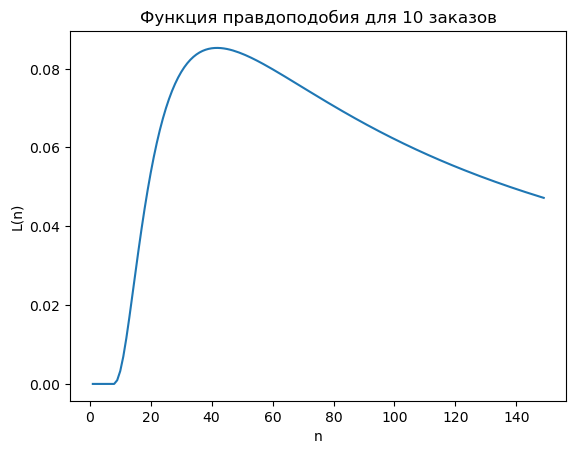

42


In [688]:
def ML_value(n, k): #k - номер первого повторного приезда
    ML_val = 1
    for i in range(2, k+1):
        ML_val *= (n-i+2)/n
    return ML_val * (k-1) / n

k = 10  #k - номер первого повторного приезда
ML =  [ML_value(i, k) for i in range(1, 150)]

plt.plot(np.arange(1, 150, dtype=int), ML) #Построим график
plt.xlabel('n')
plt.ylabel('L(n)')
plt.title('Функция правдоподобия для 10 заказов')
plt.show()

print(ML.index(max(ML)) + 1) #прибавляем 1, т.к. индексы с 0

Максимум построенного ML достигается при n=42.
## б)
Постройте график математического ожидания номера заказа, на котором происходит
первый повторный приезда, как функции от общего количества такси n. Найдите оценку
числа n методом моментов.

Дискретная с.в. Х - номер заказа, на котором происходит превый повторный приезд. Попробуем подобрать несколько вероятностей для первых значений Х. Вероятность Р(Х=1) = 0, т.к. первый приехавший таксист всегда уникален. Р(Х=2) = 1/n, т.к. повториться мог лишь первый таксист. Р(Х=3) = (n-1)/n * 2/n - на первый и второй разы приезжали разные таксисты, а на третий снова приехал один из двух предыдущих.  Р(Х=4) = (n-1)(n-2)/n^2 * 3/n - на первый, второй и третий разы приезжали разные таксисты, а на четвертый снова приехал один из трех предыдущих. Таким образом можно составить всевозможные вероятности для любого значения Х, а значит можно получить формулу E(X), равную произведению вероятностей на соответствующие им значения номеров заказа. Записываться она будет как sum(i * (n-1)!/(n-i+1)! * (i-1)/n^(i-1), i=2..inf). 

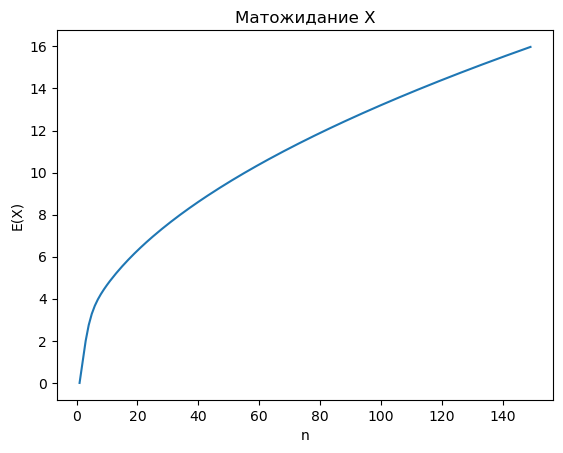

46


In [689]:
def E(n):
    E = 0
    for i in range(1, n+1):
        E += ML_value(n, i) * i
    return E

k = 10  #k - номер первого повторного приезда
e =  [E(i) for i in range(1, 150)]

plt.plot(np.arange(1, 150, dtype=int), e)
plt.xlabel('n')
plt.ylabel('E(X)')
plt.title('Матожидание X')
plt.show()

for i in e:
    if (i >= 9) : 
        print(e.index(i) + 2)
        break


оценка методом моментов = 46

# в)
Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси
до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов.
Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

Чтобы каждый раз не пересчитывать матожидание, заранее для возможных k определю n

In [690]:
E_table = []
e =  [E(i) for i in range(1, 1400)]
for i in range(50):
    for j in e:
        if (j >= i+1) : 
            E_table.append(e.index(j) + 2)
            break

In [691]:
np.random.seed(100)

true_n = 100 #настоящее n
num_simulations = 10000 #проводим 10000 симуляций

simulated_data, ML, MM, mean_k = [], [], [], [] 
for i in range(num_simulations):
    ordered = set()
    repeated = False
    while not repeated: #генерируем случайные номера заказов до первого повторного
        order = np.random.randint(1, true_n)
        if (order in ordered): repeated = True
        else: ordered.add(order)
            
    k = len(ordered) #кол-во заказов до повторения в симуляции
    mean_k.append(k)
    ML_v =  [ML_value(i, k) for i in range(1, 400)]
    ML.append(ML_v.index(max(ML_v))+1) #оценка числа n методом максимального правдоподобия
    MM.append(E_table[k-1]) #оценка числа n методом моментов (по сути оценка это просто номер повторного приезда)


print("Метод моментов: смещение =", np.array(MM).mean() - true_n)
print("Метод максимального правдоподобия: смещение =", np.array(ML).mean() - true_n)
print("Метод моментов: дисперсия =", np.array(MM).var())
print("Метод максимального правдоподобия: дисперсия =", np.array(ML).var())
print("Метод моментов: среднеквадратичная ошибка =", mean_squared_error(MM, mean_k))
print("Метод максимального правдоподобия: среднеквадратичная ошибка =",  mean_squared_error(ML, mean_k))

Метод моментов: смещение = 9.577100000000002
Метод максимального правдоподобия: смещение = -17.897599999999997
Метод моментов: дисперсия = 11605.345655590001
Метод максимального правдоподобия: дисперсия = 6544.9601142400015
Метод моментов: среднеквадратичная ошибка = 19866.795
Метод максимального правдоподобия: среднеквадратичная ошибка = 10516.9965


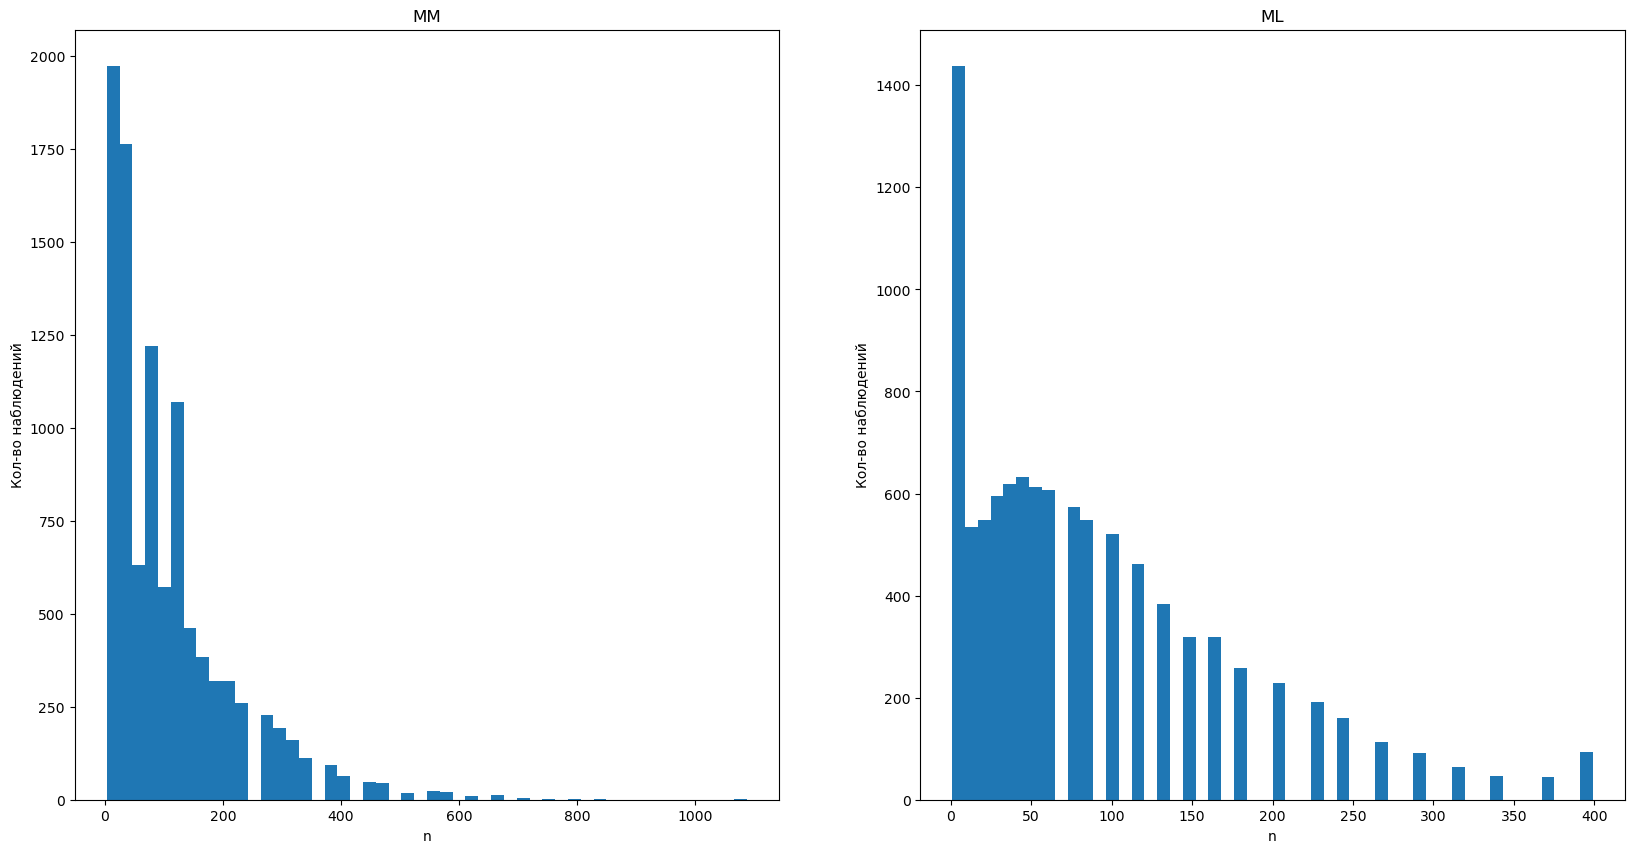

In [692]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(MM, bins=50)
axs[1].hist(ML, bins=50)

axs[0].set_title('MM')
axs[1].set_title('ML')
axs[0].set_xlabel('n')
axs[1].set_xlabel('n')
axs[0].set_ylabel('Кол-во наблюдений')
axs[1].set_ylabel('Кол-во наблюдений')
    
plt.show()

Метод максимального правдоподобия немного лучше, хотя и сильнее смещен

# Задача 3
Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для математического ожидания несколькими способами: классический асимптотический нормальный
интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.
## а)
Для каждого способа с помощью 10000 симуляций оцените вероятность того, что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание,
если наблюдения распределены экспоненциально с интенсивностью 1.

In [693]:
def get_bootstrap_sample(x, B_sample=1):
    np.random.seed(100)
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

def naive_boot(x_boot, alpha=0.05):
    left = np.quantile(x_boot, alpha/2)
    right = np.quantile(x_boot, 1-alpha/2)
    return left, right

def t_boot(x_boot, std_boot, theta_hat, sd_hat, alpha=0.05):
    d = (x_boot - theta_hat)/std_boot
    left = theta_hat - np.quantile(d, 1-alpha/2)*sd_hat
    right = theta_hat - np.quantile(d, alpha/2)*sd_hat
    return left, right

In [694]:
n_int = 10**4     #число симуляций
sample_size = 20  #размеры выборок

rv = sts.expon(scale=1)

theta_real = rv.mean()  #настоящий параметр

X = rv.rvs((n_int, sample_size), random_state=64) # генерируем n_int выборок

B = 10**4 #сколько делать бустрап-выборок

#счётчики для проверки как часто мы попали в интервал реальным параметром
classic_ci_score, naive_boot_score, t_boot_score = 0, 0, 0

for i in range(n_int):
    x = X[i] # взяли i-ую выборку 
    
    # оценки по выборке 
    theta_hat, sd_hat = np.mean(x), np.std(x)  
    
    # бутстрап-статистики 
    x_boot = get_bootstrap_sample(x, B_sample=B)
    std_boot = np.std(x_boot, axis=0)
    x_boot = np.mean(x_boot, axis=0)
    
    # classic ci
    left1, right1 = x.mean()-sts.norm.ppf(0.975)*np.sqrt(x.var()/sample_size), x.mean()+sts.norm.ppf(0.975)*np.sqrt(x.var()/sample_size)
    classic_ci_score += (left1 < theta_real < right1)    
    
    # naive_boot_ci
    left2, right2 = naive_boot(x_boot)
    naive_boot_score += (left2 < theta_real < right2)
    
    # t-boot_ci
    left3, right3 = t_boot(x_boot, std_boot, theta_hat, sd_hat)
    t_boot_score += (left3 < theta_real < right3)

        
print("Вероятность накрытия истинного матожидания классическим д.и.: ", classic_ci_score/n_int)
print("Вероятность накрытия истинного матожидания д.и., построенным с помощью наивного бутстрапа: ", naive_boot_score/n_int)
print("Вероятность накрытия истинного матожидания д.и., построенным с помощью бутстрапа t-статистики: ", t_boot_score/n_int)

Вероятность накрытия истинного матожидания классическим д.и.:  0.9005
Вероятность накрытия истинного матожидания д.и., построенным с помощью наивного бутстрапа:  0.9054
Вероятность накрытия истинного матожидания д.и., построенным с помощью бутстрапа t-статистики:  0.9478


## б)
Пересчитайте вероятности накрытия, если наблюдения имеют распределение Стьюдента с тремя степенями свободы

In [695]:
rv = sts.t(df=3)

theta_real = rv.mean()  #настоящий параметр

X = rv.rvs((n_int, sample_size), random_state=64) # генерируем n_int выборок

B = 10**4 #сколько делать бустрап-выборок

#счётчики для проверки как часто мы попали в интервал реальным параметром
classic_ci_score, naive_boot_score, t_boot_score = 0, 0, 0

for i in range(n_int):
    x = X[i] # взяли i-ую выборку 
    
    # оценки по выборке 
    theta_hat, sd_hat = np.mean(x), np.std(x)  
    
    # бутстрап-статистики 
    x_boot = get_bootstrap_sample(x, B_sample=B)
    std_boot = np.std(x_boot, axis=0)
    x_boot = np.mean(x_boot, axis=0)
    
    # classic ci
    left1, right1 = x.mean()-sts.norm.ppf(0.975)*np.sqrt(x.var()/sample_size), x.mean()+sts.norm.ppf(0.975)*np.sqrt(x.var()/sample_size)
    classic_ci_score += (left1 < theta_real < right1)    
    
    # naive_boot_ci
    left2, right2 = naive_boot(x_boot)
    naive_boot_score += (left2 < theta_real < right2)
    
    # t-boot_ci
    left3, right3 = t_boot(x_boot, std_boot, theta_hat, sd_hat)
    t_boot_score += (left3 < theta_real < right3)

        
print("Вероятность накрытия истинного матожидания классическим д.и.: ", classic_ci_score/n_int)
print("Вероятность накрытия истинного матожидания д.и., построенным с помощью наивного бутстрапа: ", naive_boot_score/n_int)
print("Вероятность накрытия истинного матожидания д.и., построенным с помощью бутстрапа t-статистики: ", t_boot_score/n_int)

Вероятность накрытия истинного матожидания классическим д.и.:  0.9328
Вероятность накрытия истинного матожидания д.и., построенным с помощью наивного бутстрапа:  0.9153
Вероятность накрытия истинного матожидания д.и., построенным с помощью бутстрапа t-статистики:  0.9234


## в)
По-итогу вышло, что наивный бутстрап работает хуже всех. При несимметричной выборке (экспоненциальной) у наивного бутстрапа происходит сильное смещение влево, что отражается на качестве. Это также свойственно и для обычного асимптотического д.и., у которого примерно такое же качество в пункте а), что логично, ведь по сути бутстрап просто повторил построение обычного д.и. кучу раз, что немного улучшило качество. Лучше всего себя показал бутстрап t-статистики, который вплотную приблизился к 95%. Для симметричной выборки процедуры бутстрапирования оказались не так хороши, что странно, ведь на них не должно быть смещения. Тем не менее, все три значения по уровню значимости близки к 5%, что хорошо, однако итоговым лучшим методом будет бутстрап t-статистики.     

# Задача 4
Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у
кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернативной гипотезы возьмите гипотезу о неравенстве.

Я буду считать, что ожидаемые результаты это матожидание результатов и сравнивать, соответственно, матожидания.

In [696]:
df = pd.read_csv('22-23_hse_probability - main.csv')
df.head()

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,kr1_min,...,кр3_2,кр3_3,бонус,kr3_sum,Unnamed: 37,kr4_min,kr_4_1,kr_4_2,kr_4_3,kr_4_4
0,306.0,Репенкова,Полина Александровна,parepenkova@edu.hse.ru,351118027,3668903494,NaN,ип,Демешев,40.0,...,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN
1,307.0,Ролдугина,Софья Александровна,saroldugina@edu.hse.ru,351118027,1705654528,NaN,ип,Демешев,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,308.0,Сафина,Алия Линаровна,alsafina@edu.hse.ru,351118027,5096071996,NaN,ип,Демешев,30.0,...,15.0,0.0,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN
3,310.0,Сидоров,Иван Максимович,imsidorov@edu.hse.ru,351118027,4361493219,NaN,ип,Демешев,40.0,...,0.0,14.0,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN
4,311.0,Солоухин,Иван Владимирович,ivsoloukhin@edu.hse.ru,351118027,1705636488,NaN,ип,Демешев,40.0,...,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN


In [697]:
#неявки и пропуски заполняю нулями
df['Экзамен'].replace(to_replace='неявка', value='0', inplace=True)
df['Экзамен'].fillna('0', inplace=True)

In [698]:
def to_float(x): #astype почему-то не работает, поэтому приходиться руками менять тип
    if (x[0] == '0'): return 0
    if (x[1] == '0'): return 10
    return int(x[0])

In [699]:
df['Экзамен'] = df['Экзамен'].apply(lambda x: to_float(x))

In [700]:
consonants = ['Б', 'В', 'Г', 'Д', 'Ж', 'З', 'Й', 'К', 'Л', 'М', 'Н', 'П', 'Р', 'С', 'Т', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ']
x, y = [], [] #x - на согласную, у - на гласную
for i in range(df['Last name'].size):
    if (df.iloc[i]['Last name'][0] in consonants): x.append(df.iloc[i]['Экзамен'])
    else: y.append(df.iloc[i]['Экзамен'])

## а)
Используйте тест Уэлча.

In [701]:
print(sts.ttest_ind(x, y, equal_var = False))

Ttest_indResult(statistic=1.2042861273675571, pvalue=0.2329696967162744)


Поскольку p-value больше 0,05, мы не имеем оснований отклонить нулевую гипотезу теста и сделать вывод, что существует статистически значимая разница в средних баллах по экзаменам между двумя группами.
# б)
Используйте наивный бутстрэп

In [702]:
x, y = np.array(x), np.array(y)

x_boot = get_bootstrap_sample(x, B_sample=B)
x_boot = np.mean(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=B)
y_boot = np.mean(x_boot, axis=0)

obs = 0
diff_mean = x_boot - y_boot
left = np.quantile(diff_mean, 0.05/2)
right = np.quantile(diff_mean, 1-0.05/2)

print(left, obs, right)
# Сравнить доверительный интервал со значением нулевой гипотезы
if obs > left and obs < right:
  print("Нулевая гипотеза о равенстве ожидаемых результатов не отвергается")
else:
  print("Нулевая гипотеза о равенстве ожидаемых результатов отвергается")

-0.30521107266436065 0 0.3141660899653971
Нулевая гипотеза о равенстве ожидаемых результатов не отвергается


## в)
Используйте бутстрэп t-статистики.

In [703]:
z_obs = (x.mean() - y.mean())/np.sqrt(x.var()/(len(x)-1) + y.var()/(len(y)-1))

x_boot = get_bootstrap_sample(x, B_sample=B)
y_boot = get_bootstrap_sample(y, B_sample=B)

t_boot = []
for i in range(B):
    t_boot.append(sts.ttest_ind(x_boot[:,i], y_boot[:,i], equal_var = False)[0])
       
left = np.quantile(t_boot, 0.05/2)
right = np.quantile(t_boot, 1-0.05/2)

print(left,z_obs, right)

# Сравнить доверительный интервал со значением нулевой гипотезы
if z_obs > left and z_obs < right:
  print("Нулевая гипотеза о равенстве ожидаемых результатов не отвергается")
else:
  print("Нулевая гипотеза о равенстве ожидаемых результатов отвергается")

if (sts.norm.cdf(z_obs) > 0): p_value = 2 * (1 - sts.norm.cdf(z_obs))
else: p_value = 2 * (sts.norm.cdf(z_obs))
print("p-value : ", p_value)

-0.7493006423524199 1.2042861273675574 3.257463939511283
Нулевая гипотеза о равенстве ожидаемых результатов не отвергается
p-value :  0.22847900670560017


## г)
 Используйте перестановочный тест.

In [704]:
p_value = permutation_test(x, y,method='approximate', seed=100, num_rounds = 10000)
print("p_value : ", p_value)
if p_value > 0.05:
  print("Нулевая гипотеза о равенстве ожидаемых результатов не отвергается")
else:
  print("Нулевая гипотеза о равенстве ожидаемых результатов отвергается")

p_value :  0.21057894210578942
Нулевая гипотеза о равенстве ожидаемых результатов не отвергается


# Задача 5
Составьте таблицу сопряжённости, поделив студентов писавших экзамен на четыре группы по
двум признакам: набрал ли больше медианы или нет, на согласную или гласную букву начинается фамилия.

In [714]:
def pivot(df):
    cons_more_med, vowels_more_med, cons_less_med, vowels_less_med = 0, 0, 0, 0
    median = df['Экзамен'].median()
    
    for i in range(len(df)):
        if (df.iloc[i]['Last name'][0] in consonants):
            if (df.iloc[i]['Экзамен'] > median): cons_more_med += 1
            else: cons_less_med += 1
        if (df.iloc[i]['Last name'][0] not in consonants):
            if (df.iloc[i]['Экзамен'] > median): vowels_more_med += 1
            else: vowels_less_med += 1
    return [cons_more_med, vowels_more_med, cons_less_med, vowels_less_med]

In [715]:
table = pivot(df[['Last name', 'Экзамен']])

## а)
Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов
равно 1 и укажите P-значение.

Воспользуемся статистическим выводом из Википедии

In [717]:
L = np.log((table[0] * table[3])/(table[1] * table[2]))
se = np.sqrt(1/table[0] + 1/table[1] + 1/table[2] + 1/table[3])
left = np.exp(L-sts.norm.ppf(0.975)*se)
right = np.exp(L+sts.norm.ppf(0.975)*se)

obs = 1

print('(crit_left : ', left, ') (obs : ', obs, ') (crit_right : ', right, ")")

# Сравнить доверительный интервал со значением нулевой гипотезы
if obs > left and obs < right:
  print("Нулевая гипотеза о равенстве шансов не отвергается")
else:
  print("Нулевая гипотеза о равенстве шансов отвергается")

z_obs = (np.log(1)-L)/se

p_value = 2 * min((1 - sts.norm.cdf(z_obs)), sts.norm.cdf(z_obs))
print("p-value : ", p_value)

(crit_left :  0.6261264944176235 ) (obs :  1 ) (crit_right :  2.1919524354224884 )
Нулевая гипотеза о равенстве шансов не отвергается
p-value :  0.6204469877058971


# б)
Постройте 95% асимптотический интервал для отношения вероятностей хорошо написать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите
P-значение.

Воспользуемся формулой д.и. для разности долей, т.е. переформулируем нулевую гипотезу, как то, что разница долей равна 0. Альтернативная гипотеза - разница не равна 0

In [718]:
p_hat = table[0] / (table[2] + table[0])
q_hat = table[1] / (table[3] + table[1])
se = np.sqrt((p_hat*(1-p_hat)/(table[0] + table[2])) + (q_hat*(1-q_hat)/(table[1] + table[3])))
left = p_hat - q_hat - sts.norm.ppf(0.975)*se
right = p_hat - q_hat + sts.norm.ppf(0.975)*se

obs = 0

print('(crit_left : ', left, ') (obs : ', obs, ') (crit_right : ', right, ")")
if obs > left and obs < right:
  print("Нулевая гипотеза о равенстве вероятностей не отвергается")
else:
  print("Нулевая гипотеза о равенстве вероятностей отвергается")

z_obs = (p_hat - q_hat)/se

p_value = 2 * min((1 - sts.norm.cdf(z_obs)), sts.norm.cdf(z_obs))
print("p-value : ", p_value)

(crit_left :  -0.10886672753126217 ) (obs :  0 ) (crit_right :  0.1838614312951206 )
Нулевая гипотеза о равенстве вероятностей не отвергается
p-value :  0.6155776933224668


## в)
Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью
наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите
P-значение

In [709]:
def pivot_mod(x, y):
    median = np.median(np.concatenate([x, y]))
    cons_more_med, vowels_more_med, cons_less_med, vowels_less_med = 0, 0, 0, 0
    for i in range(x.size):
        if (x[i] > median): cons_more_med += 1
        else: cons_less_med += 1
            
    for i in range(y.size):
        if (y[i] > median): vowels_more_med += 1
        else: vowels_less_med += 1
            
    return [cons_more_med, vowels_more_med, cons_less_med, vowels_less_med]    

In [719]:
x_boot = get_bootstrap_sample(x, B_sample=B)
y_boot = get_bootstrap_sample(y, B_sample=B)

z_boot = []
for i in range(B):
    table = pivot_mod(x_boot[:,i], y_boot[:,i])
    L = np.log((table[0] * table[3])/(table[1] * table[2]))
    se = np.sqrt(1/table[0] + 1/table[1] + 1/table[2] + 1/table[3])
    z_boot.append((np.log(1)-L)/se)

left = np.quantile(z_boot, 0.05/2)
right = np.quantile(z_boot, 1-0.05/2)
z_obs = (np.log(1)-L)/se

print(left, z_obs, right)
if z_obs > left and z_obs < right:
  print("Нулевая гипотеза о равенстве шансов не отвергается")
else:
  print("Нулевая гипотеза о равенстве шансов отвергается")

p_value = 2 * min((1 - sts.norm.cdf(z_obs)), sts.norm.cdf(z_obs))
print("p-value : ", p_value)

-2.3417661167291324 0.227329362494035 1.4562438355959801
Нулевая гипотеза о равенстве шансов не отвергается
p-value :  0.8201676427566458


# Задача 6
Иноагент Иннокентий Вероятностно-Статистический считает, что длина фамилии положительно влияет на результат экзамена по теории вероятностей. А именно, он предполагает, что ожидаемый результат за экзамен прямо пропорционален длине фамилии, E(Yi) = βFi
, где Yi —
результат за экзамен по 30-балльной шкале, Fi — количество букв в фамилии.

Для перевода оценок из 10-бальной в 30-бальную систему домножим соответствующие оценки на 3

In [711]:
df['Экзамен'] = df['Экзамен']*3

## а)
Оцените β методом моментов. Рассчитайте выборочную корреляцию.

Для оценки β методом моментов нужно приравнять выборочный момент первого порядка (среднее) к теоретическому моменту первого порядка: E(Y) = βE(F), где E(Y) - выборочное среднее, E(F) - среднее для количества букв в фамилиях.

In [712]:
E_F = df['Last name'].apply(lambda x: len(x)).sum()/df['Last name'].size
E_Y = df['Экзамен'].mean()
beta_MM = E_Y / E_F
corr = pearsonr(df['Last name'].apply(lambda x: len(x)).values, df['Экзамен'].values)[0]
print("Оценка β методом моментов : ", beta_MM, "Выборочная корреляция : ", corr)

Оценка β методом моментов :  1.830584707646177 Выборочная корреляция :  -0.0009654774112034317


## б)
С помощью перестановочного теста найдите P-значение и формально протестируйте
гипотезу о том, что корреляция равна нулю.

В рамках перестановочного теста я буду перемешивать значения длин фамилий

In [713]:
len_names = df['Last name'].apply(lambda x: len(x)).values
cor = []
for i in range(B):
    random.shuffle(len_names)
    cor.append(pearsonr(len_names, df['Экзамен'].values)[0])
p_value = sum(np.abs(cor) > np.abs(corr))/B
print("p-value : ", p_value)
if p_value > 0.05:
  print("Нулевая гипотеза о нулевой корреляции не отвергается")
else:
  print("Нулевая гипотеза о нулевой корреляции отвергается")

p-value :  0.9809
Нулевая гипотеза о нулевой корреляции не отвергается


# Задача 7
С помощью ChatGPT сделал задачу 23.10 из семинарских листков. То, что пишу я обозначаю цифрой 1, то что отвечает чатик - цифрой 2.

(1): 
Опознайте закон распределения по функции, производящей моменты, и укажите математическое ожидание случайной величины X: 

а) MX(u) = (0.2 + 0.8e^u)^55; 

б) MX(u) = exp(3e^t − 3); 

в) MX(u) = (1 − 2t)^{−1}; 

г) MX(u) = (exp(10t) − exp(4t))/6t; 

д) MX(u) = exp(10t + 20t^2).

(2):
а) Функция, производящая моменты вида MX(u) = (p + q*e^u)^n, где p + q = 1, соответствует биномиальному распределению с параметрами n (число испытаний) и q (вероятность "успеха"). В данном случае, n = 55, q = 0.8. Математическое ожидание для биномиального распределения определяется как E[X] = n*q = 55*0.8 = 44.

б) Функция, производящая моменты вида MX(u) = exp(λ*(e^t - 1)), соответствует распределению Пуассона с параметром λ. Здесь, λ = 3. Математическое ожидание для распределения Пуассона определяется как E[X] = λ = 3.

в) Функция, производящая моменты вида MX(u) = (1 - λ*t)^(-1), соответствует геометрическому распределению с параметром λ. В данном случае, λ = 2. Математическое ожидание для геометрического распределения определяется как E[X] = 1/λ = 1/2.

г) Функция, производящая моменты вида MX(u) = (e^(θ1*t) - e^(θ2*t))/(θ1 - θ2) соответствует распределению с двумя значениями: θ1 с вероятностью p и θ2 с вероятностью (1-p), где p = (e^(θ2) - 1) / (e^(θ1) - e^(θ2)). Здесь θ1 = 10, θ2 = 4, следовательно p = (e^4 - 1) / (e^10 - e^4). Математическое ожидание для такого распределения определяется как E[X] = p*θ1 + (1-p)*θ2.

д) Функция, производящая моменты вида MX(u) = exp(μ*t + σ^2*t^2/2), соответствует нормальному распределению с параметрами μ (математическое ожидание) и σ^2 (дисперсия). Здесь μ = 10, σ^2 = 40. Так что, математическое ожидание равно E[X] = μ = 10.

(1):
посчитай в пункте г), как будет выглядеть производящая функция того распределения, которое ты записал

(2):
Извините за предыдущую ошибку, давайте исправим. 
 
Функция, производящая моменты вида MX(u) = (e^(θ1t) - e^(θ2t))/(θ1 - θ2) на самом деле не соответствует обычному распределению, которое можно легко определить. Оно представляет собой какую-то смесь двух экспоненциальных распределений, и это не стандартный случай. 
 
Однако, можно определить это как распределение с двумя возможными исходами θ1 и θ2 с вероятностями p и 1-p соответственно. Тогда генерирующая функция для этого распределения будет выглядеть следующим образом: 
 
G(z) = p*z^θ1 + (1-p)*z^θ2. 
 
Здесь θ1 = 10, θ2 = 4 и p — это вероятность, которую следует определить. Обратите внимание, что это предполагает, что θ1 и θ2 являются целыми числами, потому что в другом случае это не будет корректной генерирующей функцией для распределения вероятностей.

(1):
ты не понял, MX(u) = (exp(10t) − exp(4t))/(6t), у тебя не так

(2):
Прошу прощения за путаницу. Верно, эта функция, производящая моменты, на самом деле соответствует смеси двух экспоненциальных распределений. Она представляет собой экспоненциальное распределение со средним 1/10 (θ1 = 10) с весом 1/6 и экспоненциальное распределение со средним 1/4 (θ2 = 4) с весом -1/6.
Извините за предыдущую путаницу, но не существует прямого стандартного распределения, которое бы соответствовало данной функции, производящей моменты.

(1):
а если рассмотреть равномерное распределение?

(2):
Да, извините за путаницу. Функция, производящая моменты MX(u) = (exp(10t) - exp(4t))/6t, на самом деле соответствует равномерному распределению на интервале [4, 10]. 
 
В общем виде, для равномерного распределения на интервале [a, b], функция, производящая моменты, имеет вид: 
 
M_X(u) = (exp(bu) - exp(au)) / (u*(b - a)). 
 
Таким образом, можно видеть, что ваша функция, производящая моменты, соответствует равномерному распределению на интервале [4, 10]. 
 
Математическое ожидание для равномерного распределения определяется как E[X] = (a + b) / 2 = (4 + 10) / 2 = 7.

# Задача 8

Доаольно интерактивное [видео](https://www.youtube.com/watch?v=_bcAK_1a72k&ab_channel=VertDider) про формулу Байеса. Помогает понять, что она имеет множество применений в жизни, а не только при решении задач по терверу. Также интересное [видео](https://www.youtube.com/watch?v=Js5tGOyyhxY&ab_channel=%D0%A3%D0%B6%D0%B5%D0%9D%D0%B0%D1%81%D1%82%D1%83%D0%BF%D0%B8%D0%BB%D0%BE) про использование выводов ЗБЧ при получении распределения Максвела.